# Wind Turbine Analytics
Data Analytics and Classification Model for Failure Detection of Wind Turbine from IIoT Data

![](wtech-Adion.jpg)
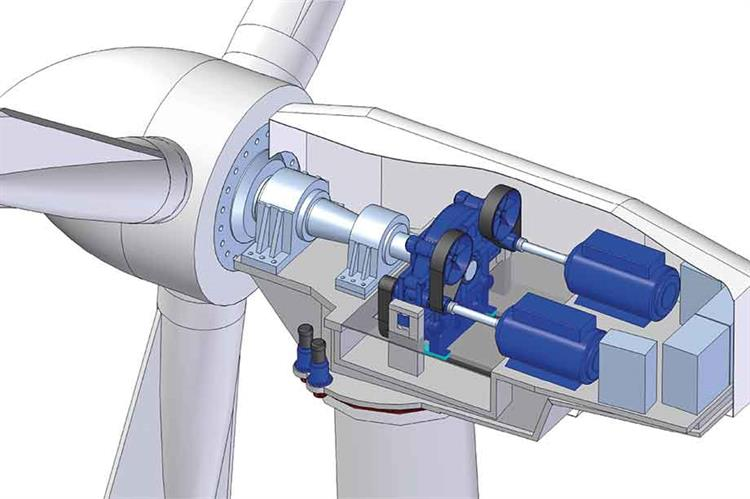

In [574]:
# Importing important Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma.extras import unique
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')


# for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder, LabelBinarizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#  for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Data Retrieval

In [575]:
df = pd.read_csv('pred_maint_wind.csv')
df.head()

DateTime        Time  Error  WEC: ava. windspeed  WEC: max. windspeed  \
0  5/1/2014 0:00  1398920448      0                  6.9                  9.4   
1  5/1/2014 0:09  1398920960      0                  5.3                  8.9   
2  5/1/2014 0:20  1398921600      0                  5.0                  9.5   
3  5/1/2014 0:30  1398922240      0                  4.4                  8.3   
4  5/1/2014 0:39  1398922752      0                  5.7                  9.7   

   WEC: min. windspeed  WEC: ava. Rotation  WEC: max. Rotation  \
0                  2.9                 0.0                0.02   
1                  1.6                 0.0                0.01   
2                  1.4                 0.0                0.04   
3                  1.3                 0.0                0.08   
4                  1.2                 0.0                0.05   

   WEC: min. Rotation  WEC: ava. Power  ...  Rectifier cabinet temp.  \
0                 0.0                0  ...                       24   
1                 0.0                0  ...                       24   
2                 0.0                0  ...                       24   
3                 0.0                0  ...                       23   
4                 0.0                0  ...                       23   

   Yaw inverter cabinet temp.  Fan inverter cabinet temp.  Ambient temp.  \
0                          20                          25             12   
1                          20                          25             12   
2                          20                          25             12   
3                          21                          25             12   
4                          21                          25             12   

   Tower temp.  Control cabinet temp.  Transformer temp.  \
0           14                     24                 34   
1           14                     24                 34   
2           14                     24                 34   
3           14                     24                 34   
4           14                     23                 34   

   RTU: ava. Setpoint 1  Inverter averages  Inverter std dev  
0                  2501          25.272728          1.103713  
1                  2501          25.272728          1.103713  
2                  2501          25.272728          1.103713  
3                  2501          25.272728          1.103713  
4                  2501          25.272728          1.103713  

[5 rows x 66 columns]

In [576]:
df.info

<bound method DataFrame.info of              DateTime        Time  Error  WEC: ava. windspeed  \
0       5/1/2014 0:00  1398920448      0                  6.9   
1       5/1/2014 0:09  1398920960      0                  5.3   
2       5/1/2014 0:20  1398921600      0                  5.0   
3       5/1/2014 0:30  1398922240      0                  4.4   
4       5/1/2014 0:39  1398922752      0                  5.7   
...               ...         ...    ...                  ...   
49022  4/8/2015 23:20  1428553216      0                  3.9   
49023  4/8/2015 23:30  1428553856      0                  3.9   
49024  4/8/2015 23:39  1428554368      0                  4.2   
49025  4/8/2015 23:50  1428555008      0                  4.1   
49026   4/9/2015 0:00  1428555648      0                  4.8   

       WEC: max. windspeed  WEC: min. windspeed  WEC: ava. Rotation  \
0                      9.4                  2.9                0.00   
1                      8.9                  1

In [577]:
df.shape

(49027, 66)

In [578]:
df.describe()

Time         Error  WEC: ava. windspeed  WEC: max. windspeed  \
count  4.902700e+04  49027.000000         49027.000000         49027.000000   
mean   1.413762e+09      0.938748             6.874626             9.340286   
std    8.559693e+06     14.442141             3.694776             5.157448   
min    1.398920e+09      0.000000             0.000000             0.000000   
25%    1.406352e+09      0.000000             4.200000             5.800000   
50%    1.413706e+09      0.000000             6.500000             8.600000   
75%    1.421179e+09      0.000000             8.900000            11.700000   
max    1.428556e+09    246.000000            32.099998            51.099998   

       WEC: min. windspeed  WEC: ava. Rotation  WEC: max. Rotation  \
count         49027.000000         49027.00000        49027.000000   
mean             12.244133             8.67852            9.547354   
std             223.186866             4.14345            4.482192   
min               0.000000             0.00000            0.000000   
25%               2.600000             6.33000            6.740000   
50%               4.400000             8.97000           10.060000   
75%               6.300000            11.92000           13.550000   
max            6553.500000            14.73000           18.910000   

       WEC: min. Rotation  WEC: ava. Power  WEC: max. Power  ...  \
count        49027.000000     49027.000000     49027.000000  ...   
mean             8.515034       942.261244      1214.015400  ...   
std             22.394531      1008.930159      1168.858993  ...   
min              0.000000         0.000000         0.000000  ...   
25%              5.880000        87.000000       138.000000  ...   
50%              7.850000       536.000000       802.000000  ...   
75%             10.390000      1551.000000      2326.000000  ...   
max            655.349976      3071.000000      3216.000000  ...   

       Rectifier cabinet temp.  Yaw inverter cabinet temp.  \
count             49027.000000                49027.000000   
mean                 30.335958                   24.320211   
std                   5.623608                    4.918045   
min                   0.000000                    0.000000   
25%                  26.000000                   20.000000   
50%                  30.000000                   25.000000   
75%                  34.000000                   28.000000   
max                  49.000000                   38.000000   

       Fan inverter cabinet temp.  Ambient temp.   Tower temp.  \
count                49027.000000   49027.000000  49027.000000   
mean                    28.802456      13.380219     23.116303   
std                      5.185007       5.246230      6.360604   
min                      0.000000       0.000000      0.000000   
25%                     25.000000       9.000000     19.000000   
50%                     29.000000      13.000000     24.000000   
75%                     33.000000      17.000000     28.000000   
max                     44.000000      35.000000     36.000000   

       Control cabinet temp.  Transformer temp.  RTU: ava. Setpoint 1  \
count           49027.000000       49027.000000          49027.000000   
mean               31.766537          43.992596           2988.628184   
std                 6.381892          10.404843            172.074485   
min                 0.000000         -19.000000              0.000000   
25%                27.000000          37.000000           3050.000000   
50%                33.000000          43.000000           3050.000000   
75%                36.000000          48.000000           3050.000000   
max                45.000000          71.000000           3050.000000   

       Inverter averages  Inverter std dev  
count       49027.000000      49027.000000  
mean           27.828410          1.855781  
std             5.595795          1.269928  
min           -14.000000          0.000000  
25%            24.3636

In [579]:
df.dtypes 

DateTime                  object
Time                       int64
Error                      int64
WEC: ava. windspeed      float64
WEC: max. windspeed      float64
                          ...   
Control cabinet temp.      int64
Transformer temp.          int64
RTU: ava. Setpoint 1       int64
Inverter averages        float64
Inverter std dev         float64
Length: 66, dtype: object

In [580]:
df.columns

Index(['DateTime', 'Time', 'Error', 'WEC: ava. windspeed',
       'WEC: max. windspeed', 'WEC: min. windspeed', 'WEC: ava. Rotation',
       'WEC: max. Rotation', 'WEC: min. Rotation', 'WEC: ava. Power',
       'WEC: max. Power', 'WEC: min. Power',
       'WEC: ava. Nacel position including cable twisting',
       'WEC: Operating Hours', 'WEC: Production kWh',
       'WEC: Production minutes', 'WEC: ava. reactive Power',
       'WEC: max. reactive Power', 'WEC: min. reactive Power',
       'WEC: ava. available P from wind',
       'WEC: ava. available P technical reasons',
       'WEC: ava. Available P force majeure reasons',
       'WEC: ava. Available P force external reasons',
       'WEC: ava. blade angle A', 'Sys 1 inverter 1 cabinet temp.',
       'Sys 1 inverter 2 cabinet temp.', 'Sys 1 inverter 3 cabinet temp.',
       'Sys 1 inverter 4 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.',
       'Sys 1 inverter 6 cabinet temp.', 'Sys 1 inverter 7 cabinet temp.',
       'Sys 2 inve


 -  Based on unique values, 'Error' is the best target feature for classification with 12 unique categories, 
 ideal for distinguishing different error types in a predictive maintenance context. 
 - 'Operating Hours' and 'Production kWh' have thousands of unique values, making them more suitable 
 for regression rather than classification.
 - 'Production Minutes' and 'ava. Power' could theoretically be classified, but may lose detail and are less informative than 'Error' for this task.


In [581]:
# Convert DateTime column to a datetime object if not already
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Exploring and Cleaning

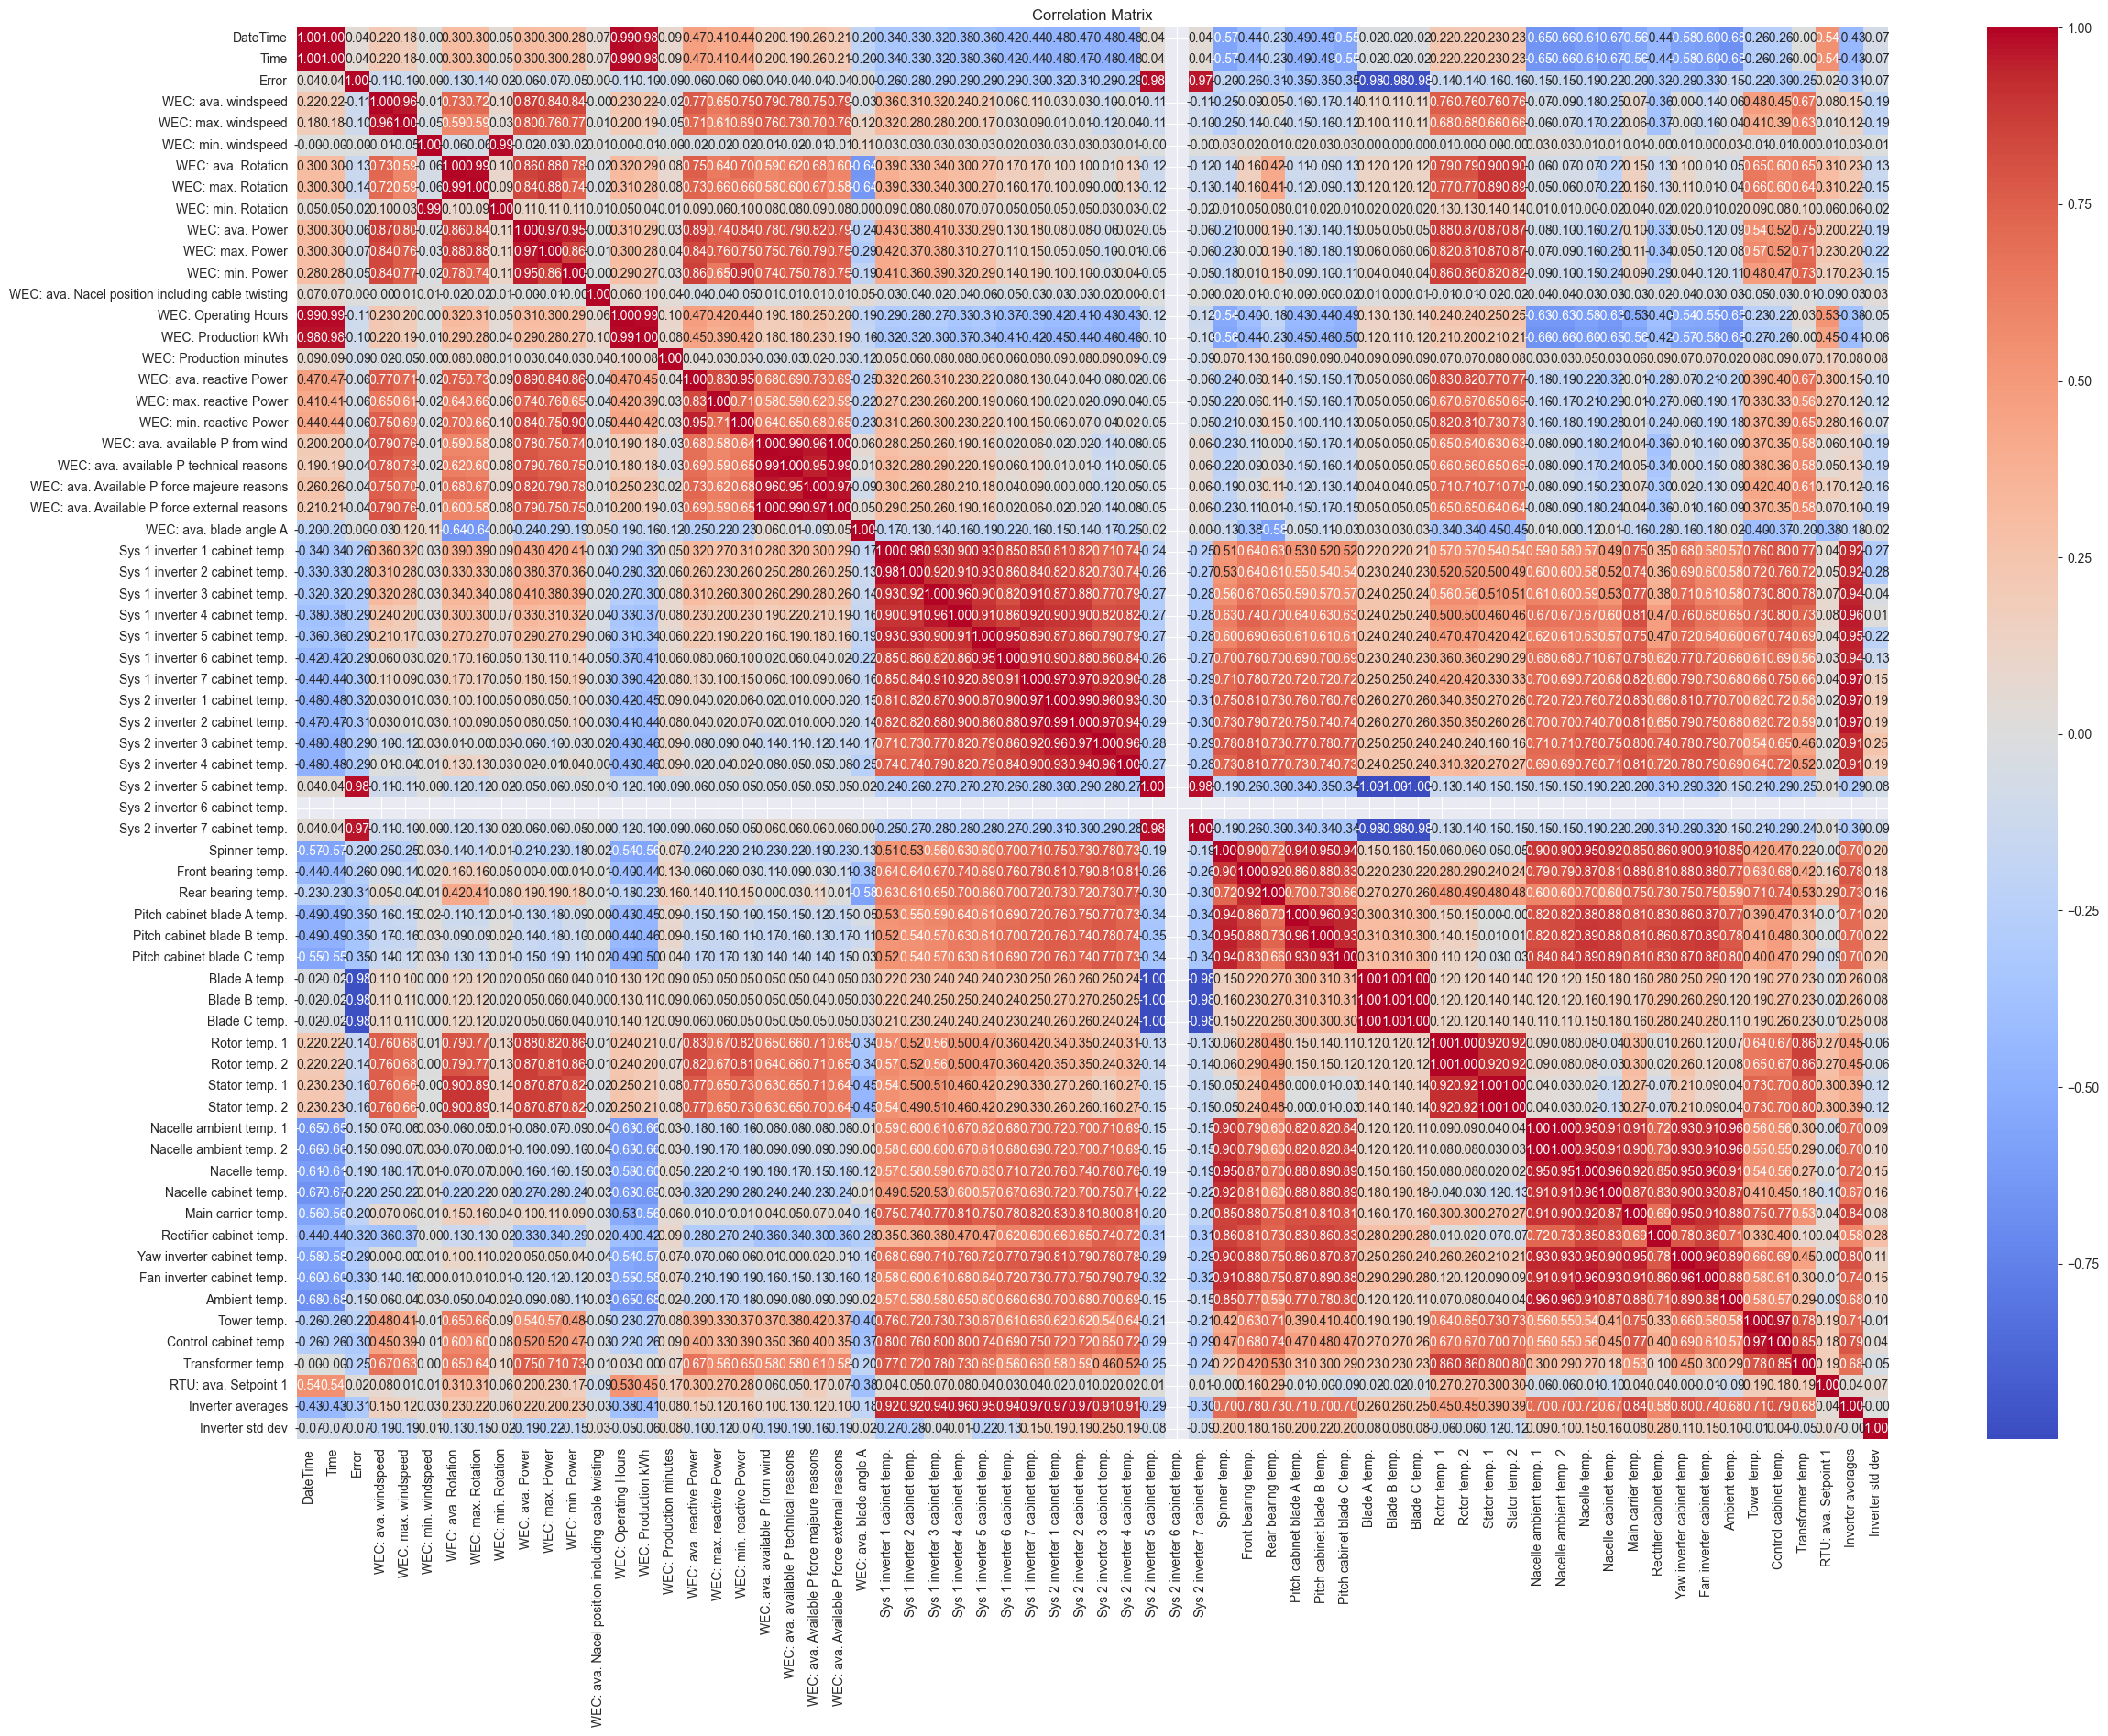

In [582]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(28, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.show()

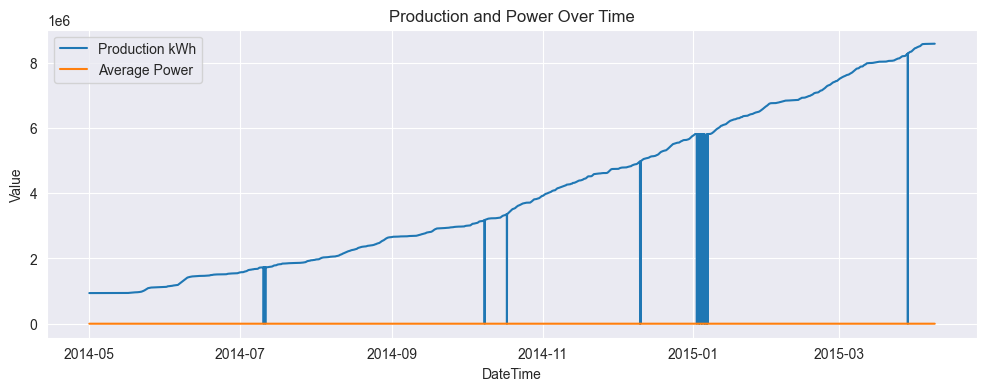

In [583]:
# Plotting production and power over time
plt.figure(figsize=(12, 4))
plt.plot(df['DateTime'], df['WEC: Production kWh'], label='Production kWh')
plt.plot(df['DateTime'], df['WEC: ava. Power'], label='Average Power')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.title('Production and Power Over Time')
plt.legend()
plt.show()

- The average power (`WEC: ava. Power`) remains constant because wind turbines operate within a fixed capacity range, determined by design and average wind conditions.
- Production (`WEC: Production kWh`) increases over time due to longer operational periods, reduced downtime(in total 6 instances), or improved turbine utilization, even when average power output stays stable.


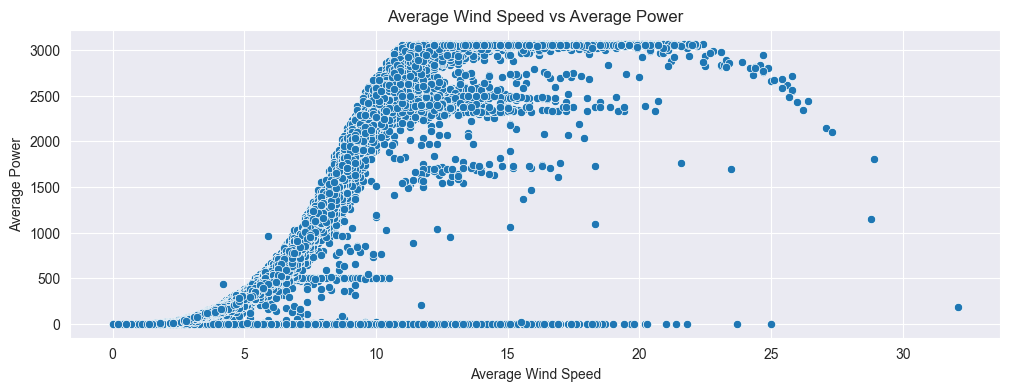

In [584]:
# Scatter plot for average wind speed and average rotation
plt.figure(figsize=(12, 4))
sns.scatterplot(data=df, x='WEC: ava. windspeed', y='WEC: ava. Power')
plt.title('Average Wind Speed vs Average Power')
plt.xlabel('Average Wind Speed')
plt.ylabel('Average Power')
plt.show()

- The turbine's rotation reaches its maximum at approximately **14.7**, likely due to design constraints and safety measures.
- Wind speed above **8.9** contributes less to rotation increases, with speeds beyond **8.9** having no further impact. In some cases, with wind speed over **23**, it leads to a decrease in rotations.
- This plateau indicates effective turbine control to optimize performance while preventing mechanical damage at high wind speeds.


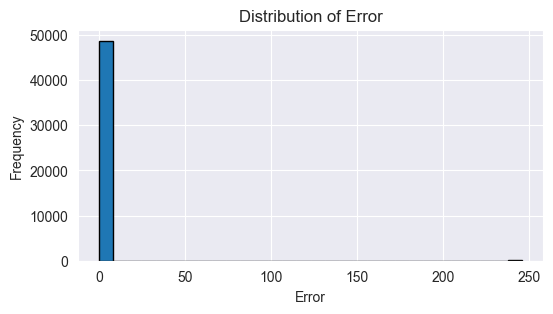

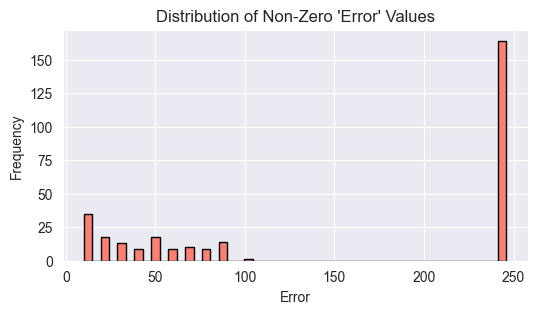

Distribution of 'Error' values:
Error
0      48727
10        35
20        18
30        13
40         9
50        18
60         9
70        10
80         9
90        14
100        1
246      164
Name: count, dtype: int64


In [585]:
# Plot a histogram of the 'Error' column
plt.figure(figsize=(6, 3))
df['Error'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


# Filter out zeros
non_zero_errors = df[df['Error'] != 0]['Error']

# Plot distribution of non-zero Error values
plt.figure(figsize=(6, 3))
plt.hist(non_zero_errors, bins=50, color='salmon', edgecolor='black')
plt.title("Distribution of Non-Zero 'Error' Values")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

# Count the occurrences of each unique value in the 'Error' column
error_distribution = df['Error'].value_counts().sort_index()

# Print the distribution
print("Distribution of 'Error' values:")
print(error_distribution)

### Distribution Analysis of the `Error` Column

The `Error` column in the dataset exhibits a **highly imbalanced distribution**:

- The majority of instances (48,727) correspond to `Error = 0`, representing normal operation without any errors.
- Non-zero error values, which likely indicate fault or abnormal states, occur far less frequently:
  - The second most frequent error (`Error = 246`) has **164 instances**, which is significantly smaller compared to the normal operation.
  - Other errors (e.g., `10`, `20`, `30`, etc.) have frequencies ranging between **1** and **35**, with `Error = 100` occurring only **once**.

This imbalance suggests that the dataset is heavily dominated by normal operational states, making it challenging to predict fault states (non-zero errors) without proper handling.

### Implications of Imbalance:
1. **Class Imbalance in Classification**:
   - If this column is used as a target for classification, the imbalance could lead to a model biased towards predicting the majority class (`Error = 0`), potentially overlooking fault states.
   - Special techniques such as **oversampling (e.g., SMOTE)**, **undersampling**, or using **class-weighted loss functions** would be required to handle this imbalance.

2. **Impact on Evaluation Metrics**:
   - Standard accuracy might be misleading in this case, as predicting only `Error = 0` would yield high accuracy due to the dominance of normal instances.
   - Metrics such as **Precision**, **Recall**, **F1-Score**, and **ROC-AUC** should be prioritized to evaluate model performance.

3. **Rare Error Values**:
   - Errors with very low frequencies (e.g., `Error = 100` with only 1 instance) may not provide sufficient data for meaningful model training.
   - These rare error types could be grouped into an "Other Errors" class to simplify the classification problem.

### Conclusion:
The extreme imbalance in the `Error` column poses challenges for classification and requires careful preprocessing and model selection to ensure the minority classes (fault states) are effectively identified.


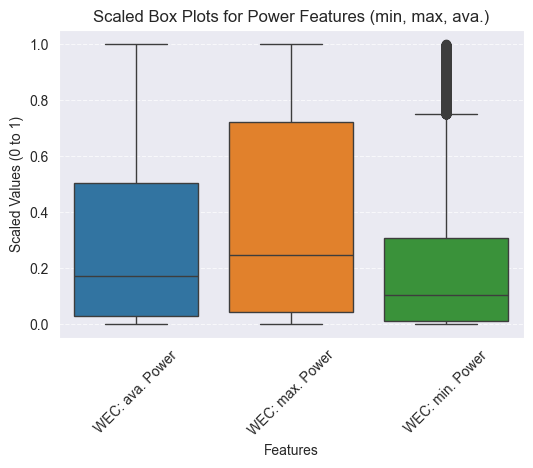

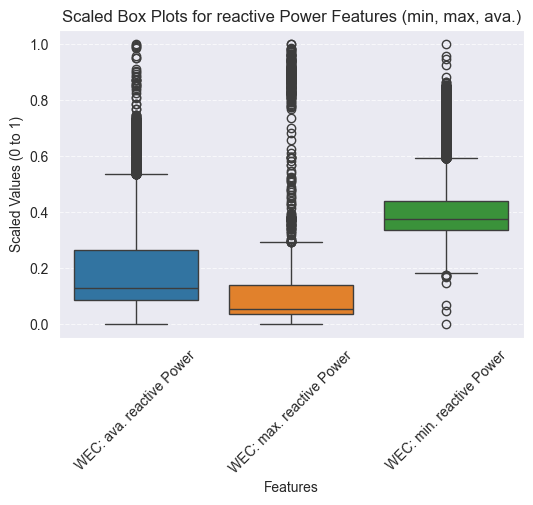

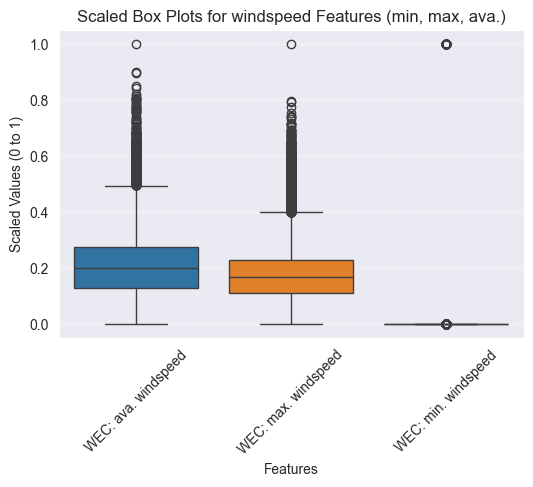

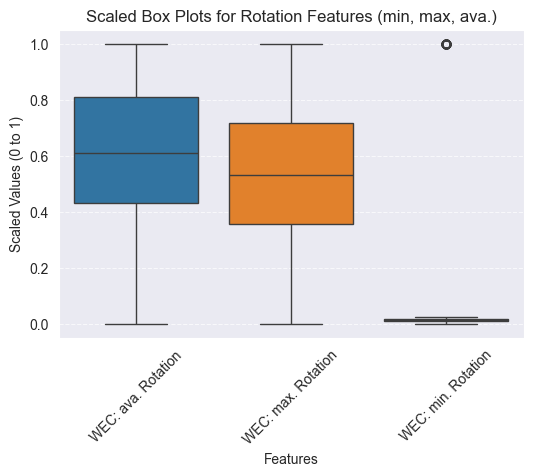

In [586]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to normalize data and plot boxplots
def plot_boxplots_with_scaling(df, feature_type, feature_keywords, exclude_keywords=None):
    """
    Normalizes data and plots boxplots for min, max, and average columns for a specific feature type.

    :param df: The DataFrame containing the data
    :param feature_type: The type of feature (e.g., 'Power', 'Windspeed')
    :param feature_keywords: A list of keywords to filter the columns (e.g., ['min', 'max', 'ava.'])
    :param exclude_keywords: List of keywords to exclude from the column filtering (e.g., ['reactive']).
    """
    # Filter columns containing the feature keywords and the feature type
    relevant_columns = [col for col in df.columns if feature_type in col and any(keyword in col for keyword in feature_keywords)]

    # Exclude columns with specific keywords, if provided
    if exclude_keywords:
        relevant_columns = [col for col in relevant_columns if not any(keyword in col.lower() for keyword in exclude_keywords)]

    # Ensure there are columns to plot
    if relevant_columns:
        # Normalize the data using MinMaxScaler
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(df[relevant_columns])
        scaled_df = pd.DataFrame(scaled_data, columns=relevant_columns)

        # Plot the boxplot
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=scaled_df)
        plt.xticks(rotation=45)
        plt.title(f'Scaled Box Plots for {feature_type} Features ({", ".join(feature_keywords)})')
        plt.ylabel('Scaled Values (0 to 1)')
        plt.xlabel('Features')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print(f"No relevant columns found for {feature_type} with keywords {feature_keywords}.")

# Define feature types and keywords to look for
feature_types = [
    {'feature_type': 'Power', 'exclude_keywords': ['reactive']},  # Only Power (not reactive)
    {'feature_type': 'reactive Power', 'exclude_keywords': None},  # Reactive Power
    {'feature_type': 'windspeed', 'exclude_keywords': None},  # Windspeed
    {'feature_type': 'Rotation', 'exclude_keywords': None},  # Rotation
]
feature_keywords = ['min', 'max', 'ava.']

# Generate scaled box plots for each feature type
for feature in feature_types:
    plot_boxplots_with_scaling(
        df,
        feature_type=feature['feature_type'],
        feature_keywords=feature_keywords,
        exclude_keywords=feature.get('exclude_keywords')
    )

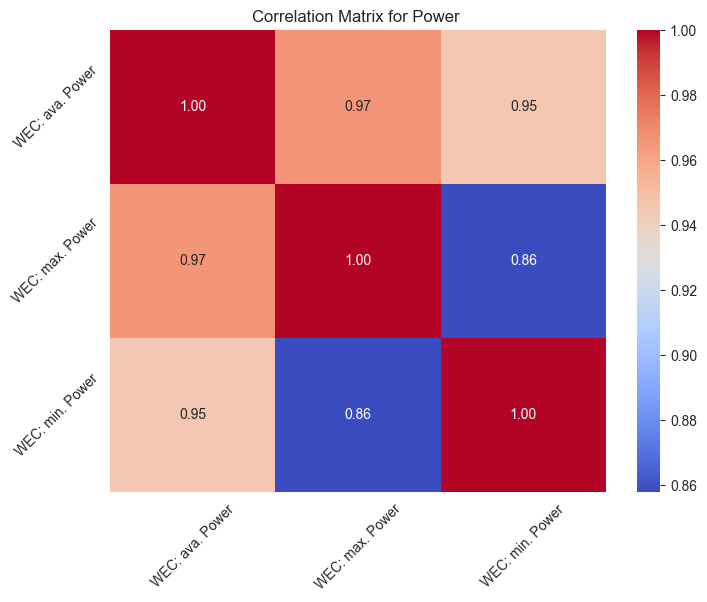


Correlation Matrix for Power :
                 WEC: ava. Power  WEC: max. Power  WEC: min. Power
WEC: ava. Power         1.000000         0.965711         0.945421
WEC: max. Power         0.965711         1.000000         0.857933
WEC: min. Power         0.945421         0.857933         1.000000


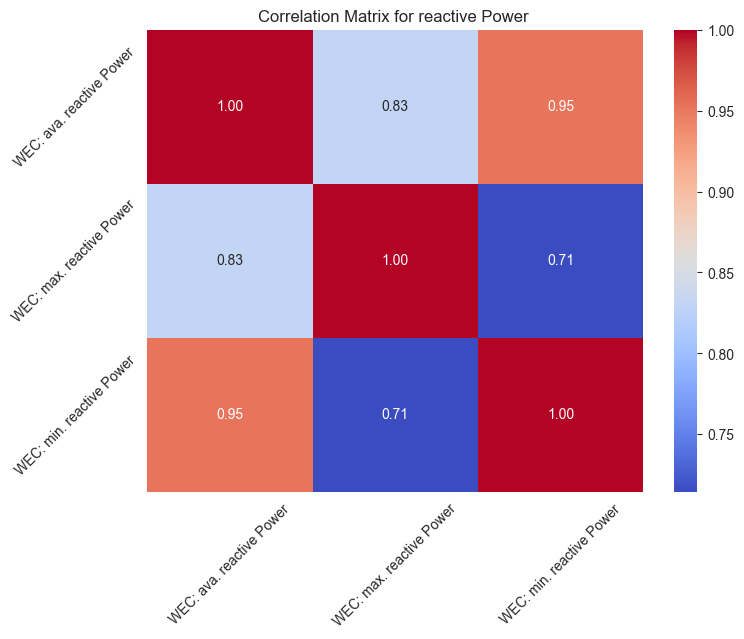


Correlation Matrix for reactive Power :
                          WEC: ava. reactive Power  WEC: max. reactive Power  \
WEC: ava. reactive Power                  1.000000                  0.831072   
WEC: max. reactive Power                  0.831072                  1.000000   
WEC: min. reactive Power                  0.952421                  0.714523   

                          WEC: min. reactive Power  
WEC: ava. reactive Power                  0.952421  
WEC: max. reactive Power                  0.714523  
WEC: min. reactive Power                  1.000000  


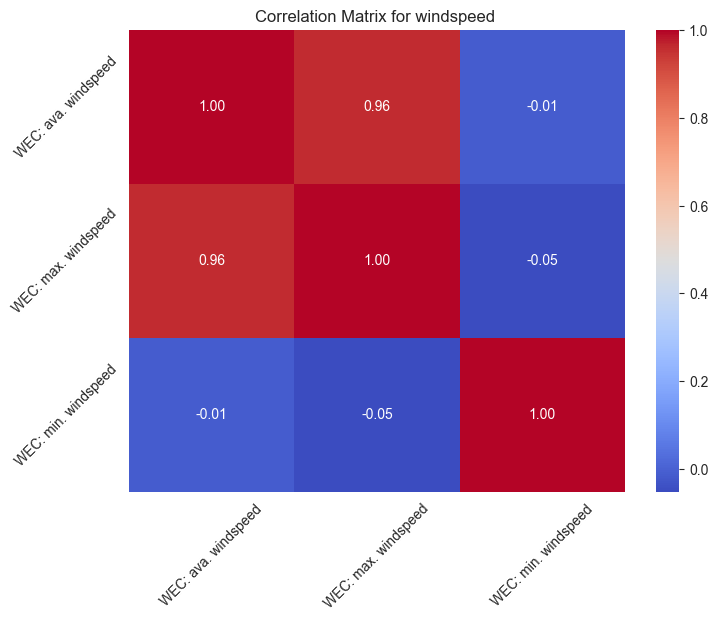


Correlation Matrix for windspeed :
                     WEC: ava. windspeed  WEC: max. windspeed  \
WEC: ava. windspeed             1.000000             0.961435   
WEC: max. windspeed             0.961435             1.000000   
WEC: min. windspeed            -0.011400            -0.052131   

                     WEC: min. windspeed  
WEC: ava. windspeed            -0.011400  
WEC: max. windspeed            -0.052131  
WEC: min. windspeed             1.000000  


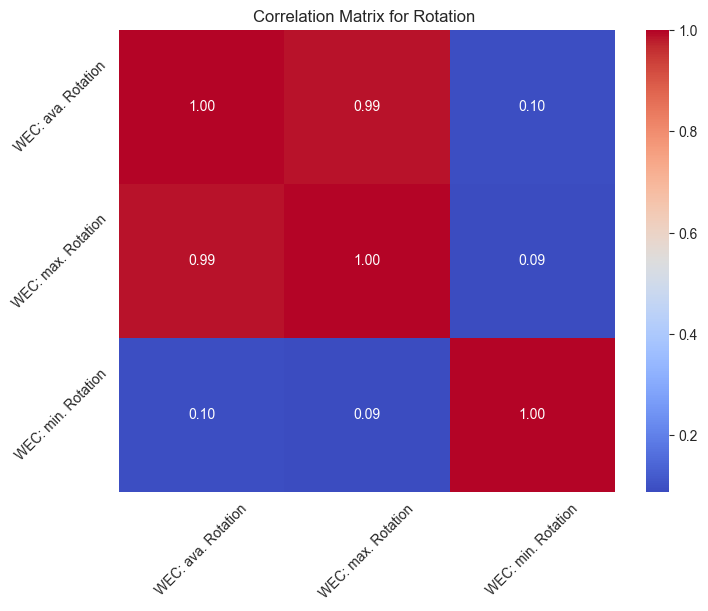


Correlation Matrix for Rotation :
                    WEC: ava. Rotation  WEC: max. Rotation  WEC: min. Rotation
WEC: ava. Rotation            1.000000            0.988052            0.095114
WEC: max. Rotation            0.988052            1.000000            0.088235
WEC: min. Rotation            0.095114            0.088235            1.000000


In [587]:
# Function to compute and plot correlation matrix for a specific feature type
def plot_correlation_matrix(df, feature_type, exclude_keywords=None):
    """
    Plots a correlation matrix for min, max, and avg columns of a given feature type.

    :param df: DataFrame containing the data
    :param feature_type: The type of feature to filter (e.g., 'Power', 'Reactive Power')
    :param exclude_keywords: List of keywords to exclude from the column filtering (e.g., ['reactive']).
    """
    # Filter columns containing the feature type and min, max, or average
    relevant_columns = [col for col in df.columns if feature_type in col and
                        ('min' in col.lower() or 'max' in col.lower() or 'ava.' in col.lower())]

    # Exclude columns with specific keywords, if provided
    if exclude_keywords:
        relevant_columns = [col for col in relevant_columns if not any(keyword in col.lower() for keyword in exclude_keywords)]

    if relevant_columns:
        # Calculate the correlation matrix
        correlation_matrix = df[relevant_columns].corr()

        # Plot the heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title(f'Correlation Matrix for {feature_type} ')
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        plt.show()

        # Print correlation matrix for inspection
        print(f"\nCorrelation Matrix for {feature_type} :")
        print(correlation_matrix)
    else:
        print(f"No relevant columns found for {feature_type}.")

# Generate correlation matrices
plot_correlation_matrix(df, feature_type='Power', exclude_keywords=['reactive'])
plot_correlation_matrix(df, feature_type='reactive Power')
plot_correlation_matrix(df, feature_type='windspeed')
plot_correlation_matrix(df, feature_type='Rotation')

After analyzing the description of the 12 columns and their correlation matrix, the following recommendations are made for feature selection to optimize the model:

#### Features to Retain:
1. **Windspeed**: Retain **`WEC: ava. windspeed`** because it captures the overall trend and is highly correlated with `WEC: max. windspeed` (correlation: 0.961), making it the most representative feature.
2. **Rotation**: Retain **`WEC: ava. Rotation`**, as it reflects the turbine's overall behavior and has a very high correlation with `WEC: max. Rotation` (correlation: 0.988).
3. **Power**: Retain **`WEC: ava. Power`**, which represents the general power output and is highly correlated with both `WEC: max. Power` (correlation: 0.965) and `WEC: min. Power` (correlation: 0.945).
4. **Reactive Power**: Retain **`WEC: ava. reactive Power`**, as it captures the overall trends and has a high correlation with `WEC: min. reactive Power` (correlation: 0.952).

#### Features to Drop:
1. **`WEC: min. windspeed`**: Drop due to a poor correlation with other windspeed features and the presence of an unrealistic outlier (`6553.5`).
2. **`WEC: min. Rotation`**: Drop because of low correlations with average (0.095) and max rotation (0.088), and potential data quality issues.
3. **`WEC: max. Power`** and **`WEC: min. Power`**: Drop as they are highly redundant with `WEC: ava. Power`, adding unnecessary noise.
4. **`WEC: max. reactive Power`** and **`WEC: min. reactive Power`**: Drop to avoid redundancy and moderate correlations (e.g., max reactive power correlates 0.831 with average).

#### Key Reasons:
1. Simplifies the model by avoiding redundancy (e.g., removing features with high correlation to another retained feature).
2. Improves data quality by excluding features with outliers or poor correlations.
3. Focuses on features that provide the most representative information (e.g., average values).

#### Next Steps Before Modeling:
1. **Outlier Removal**: Address extreme values in the `min` columns for all categories.
2. **Feature Scaling**: Apply scaling (e.g., MinMaxScaler or StandardScaler) to normalize feature ranges.
3. **Dimensionality Reduction**: Proceed with only the retained features to reduce noise and improve model efficiency.


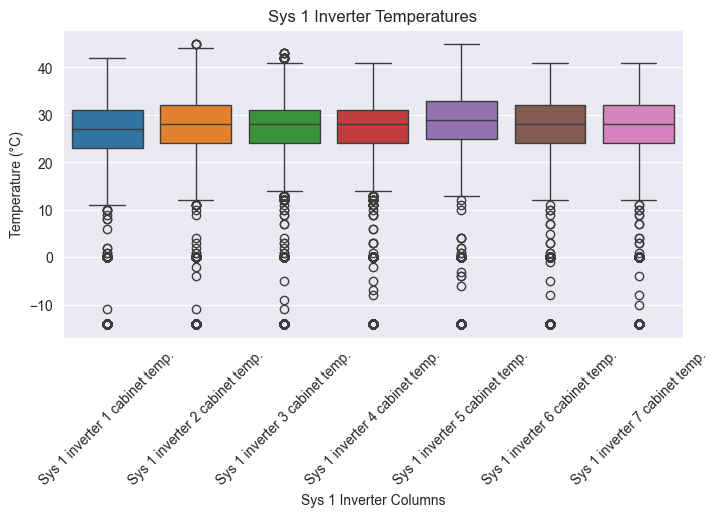

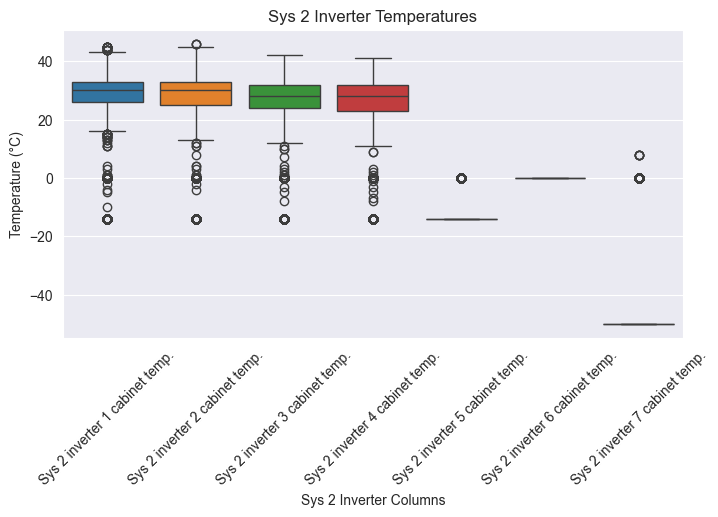

In [588]:
# Plotting inverter temperatures together
sys1_inverter_temps = ['Sys 1 inverter 1 cabinet temp.', 'Sys 1 inverter 2 cabinet temp.',
                  'Sys 1 inverter 3 cabinet temp.', 'Sys 1 inverter 4 cabinet temp.',
                  'Sys 1 inverter 5 cabinet temp.', 'Sys 1 inverter 6 cabinet temp.',
                  'Sys 1 inverter 7 cabinet temp.']
sys2_inverter_temps = ['Sys 2 inverter 1 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.',
       'Sys 2 inverter 3 cabinet temp.', 'Sys 2 inverter 4 cabinet temp.',
       'Sys 2 inverter 5 cabinet temp.', 'Sys 2 inverter 6 cabinet temp.',
       'Sys 2 inverter 7 cabinet temp.']

# Plotting Sys 1 Inverter Temperatures
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[sys1_inverter_temps])
plt.xticks(rotation=45)
plt.title('Sys 1 Inverter Temperatures')
plt.ylabel('Temperature (°C)')
plt.xlabel('Sys 1 Inverter Columns')
plt.show()

# Plotting Sys 2 Inverter Temperatures
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[sys2_inverter_temps])
plt.xticks(rotation=45)
plt.title('Sys 2 Inverter Temperatures')
plt.ylabel('Temperature (°C)')
plt.xlabel('Sys 2 Inverter Columns')
plt.show()

These boxplots show that `Sys 1` inverter temperatures are consistent and realistic, with mean values around **27°C to 28°C**, standard deviations of **~5.7°C to 6.3°C**, and maximum temperatures up to **45°C**, indicating normal operation.

In contrast, `Sys 2` displays anomalies, including extreme negative mean values (e.g., **-13.95°C**, **-49.83°C**) and minimum values of **-50°C**, likely due to faulty sensors or inactive inverters.

These irregularities in `Sys 2` require further investigation to ensure data reliability before analysis.


In [589]:
# Check for missing values
print("Missing Values per Column:")
print(df.isna().sum())

# Option 1: Drop columns with significant missing values
df = df.dropna(axis=1, thresh=int(0.8 * len(df)))  # Keep columns with at least 80% non-null values

# Option 2: Impute missing values for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())  # Replace with median

# Option 3: Impute missing values for categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Replace with mode

Missing Values per Column:
DateTime                 0
Time                     0
Error                    0
WEC: ava. windspeed      0
WEC: max. windspeed      0
                        ..
Control cabinet temp.    0
Transformer temp.        0
RTU: ava. Setpoint 1     0
Inverter averages        0
Inverter std dev         0
Length: 66, dtype: int64


In [590]:
# List of columns to drop (e.g., ID columns or irrelevant features)
columns_to_drop = ['Time', 'WEC: min. windspeed', 'WEC: max. windspeed','WEC: min. Rotation', 'WEC: max. Rotation', 'WEC: min. Power', 'WEC: max. Power', 'WEC: min. reactive Power', 'WEC: max. reactive Power','Sys 2 inverter 5 cabinet temp.', 'Sys 2 inverter 6 cabinet temp.', 'Sys 2 inverter 7 cabinet temp.']

# Drop irrelevant or redundant columns
df_filtered = df.drop(columns=columns_to_drop, errors='ignore')
print(f"Remaining columns: {df_filtered.columns.tolist()}")


Remaining columns: ['DateTime', 'Error', 'WEC: ava. windspeed', 'WEC: ava. Rotation', 'WEC: ava. Power', 'WEC: ava. Nacel position including cable twisting', 'WEC: Operating Hours', 'WEC: Production kWh', 'WEC: Production minutes', 'WEC: ava. reactive Power', 'WEC: ava. available P from wind', 'WEC: ava. available P technical reasons', 'WEC: ava. Available P force majeure reasons', 'WEC: ava. Available P force external reasons', 'WEC: ava. blade angle A', 'Sys 1 inverter 1 cabinet temp.', 'Sys 1 inverter 2 cabinet temp.', 'Sys 1 inverter 3 cabinet temp.', 'Sys 1 inverter 4 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.', 'Sys 1 inverter 6 cabinet temp.', 'Sys 1 inverter 7 cabinet temp.', 'Sys 2 inverter 1 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.', 'Sys 2 inverter 3 cabinet temp.', 'Sys 2 inverter 4 cabinet temp.', 'Spinner temp.', 'Front bearing temp.', 'Rear bearing temp.', 'Pitch cabinet blade A temp.', 'Pitch cabinet blade B temp.', 'Pitch cabinet blade C temp.', 'Blade A te

# Preparing & Transforming

In [591]:
# Define the condition for binary classification
df_filtered['Error_Class_Binary'] = df_filtered['Error'].apply(lambda x: 0 if x == 0 else 1)

# Check the distribution of the new binary classes
binary_distribution = df_filtered['Error_Class_Binary'].value_counts()

# Print the distribution
print("Distribution of 'Error_Class_Binary':")
print(binary_distribution)

# Calculate the total number of "Error Occurred" entries
error_total = binary_distribution[1]  # Count of rows where Error_Class_Binary = 1
no_error_total = binary_distribution[0]  # Count of rows where Error_Class_Binary = 0

print(f"\nSummary:")
print(f"Total No Error instances: {no_error_total}")
print(f"Total Error Occurred instances: {error_total}")

Distribution of 'Error_Class_Binary':
Error_Class_Binary
0    48727
1      300
Name: count, dtype: int64

Summary:
Total No Error instances: 48727
Total Error Occurred instances: 300


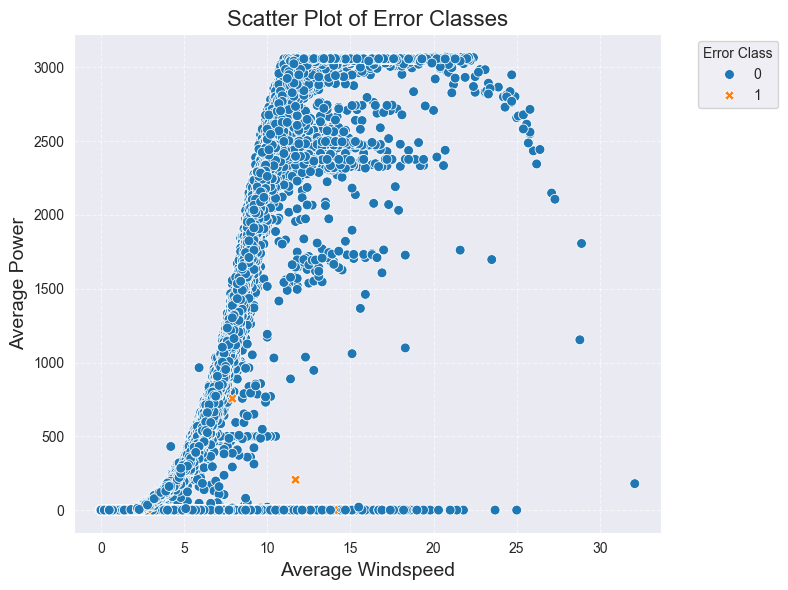

In [592]:
# Scatter plot with different colors for each Error_Class
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_filtered,
    x='WEC: ava. windspeed',  # Replace with an appropriate feature for the x-axis
    y='WEC: ava. Power',      # Replace with an appropriate feature for the y-axis
    hue='Error_Class_Binary',        # Class-based coloring
    palette='tab10',          # Use a color palette with enough distinct colors
    style='Error_Class_Binary',      # Different markers for each class
    s=50                      # Marker size
)

# Add labels and title
plt.title('Scatter Plot of Error Classes', fontsize=16)
plt.xlabel('Average Windspeed', fontsize=14)
plt.ylabel('Average Power', fontsize=14)
plt.legend(title='Error Class', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [593]:
# Scale numerical features like power and windspeed, power, rotation and reactiv power using MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['WEC: ava. windspeed', 'WEC: ava. Power', 'WEC: ava. Rotation', 'WEC: ava. reactive Power']
df_filtered[columns_to_scale] = scaler.fit_transform(df_filtered[columns_to_scale])

In [594]:
# Aggregating system temperatures
df_filtered['avg_inverter_temp'] = df_filtered[['Sys 1 inverter 1 cabinet temp.', 'Sys 1 inverter 2 cabinet temp.',
                                                'Sys 1 inverter 3 cabinet temp.', 'Sys 1 inverter 4 cabinet temp.',
                                                'Sys 1 inverter 5 cabinet temp.', 'Sys 1 inverter 6 cabinet temp.',
                                                'Sys 1 inverter 7 cabinet temp.']].mean(axis=1)

df_filtered['avg_sys2_inverter_temp'] = df_filtered[['Sys 2 inverter 1 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.',
                                                     'Sys 2 inverter 3 cabinet temp.', 'Sys 2 inverter 4 cabinet temp.']].mean(axis=1)

In [595]:
# Drop columns that will not help in prediction or are redundant
cols_to_drop = ['DateTime', 'Error', 'Sys 1 inverter 1 cabinet temp.', 'Sys 1 inverter 2 cabinet temp.',
                                                'Sys 1 inverter 3 cabinet temp.', 'Sys 1 inverter 4 cabinet temp.',
                                                'Sys 1 inverter 5 cabinet temp.', 'Sys 1 inverter 6 cabinet temp.',
                                                'Sys 1 inverter 7 cabinet temp.', 'Sys 2 inverter 1 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.',
                                                     'Sys 2 inverter 3 cabinet temp.', 'Sys 2 inverter 4 cabinet temp.']  # 'Error' could be dropped if you are creating separate classification tasks.
df_filtered = df_filtered.drop(columns=cols_to_drop, errors='ignore')

# 8. **Final Dataset Inspection**
print(f"Shape of the dataset after feature engineering: {df_filtered.shape}")
print("Columns after feature engineering:")
print(df_filtered.columns.tolist())

Shape of the dataset after feature engineering: (49027, 44)
Columns after feature engineering:
['WEC: ava. windspeed', 'WEC: ava. Rotation', 'WEC: ava. Power', 'WEC: ava. Nacel position including cable twisting', 'WEC: Operating Hours', 'WEC: Production kWh', 'WEC: Production minutes', 'WEC: ava. reactive Power', 'WEC: ava. available P from wind', 'WEC: ava. available P technical reasons', 'WEC: ava. Available P force majeure reasons', 'WEC: ava. Available P force external reasons', 'WEC: ava. blade angle A', 'Spinner temp.', 'Front bearing temp.', 'Rear bearing temp.', 'Pitch cabinet blade A temp.', 'Pitch cabinet blade B temp.', 'Pitch cabinet blade C temp.', 'Blade A temp.', 'Blade B temp.', 'Blade C temp.', 'Rotor temp. 1', 'Rotor temp. 2', 'Stator temp. 1', 'Stator temp. 2', 'Nacelle ambient temp. 1', 'Nacelle ambient temp. 2', 'Nacelle temp.', 'Nacelle cabinet temp.', 'Main carrier temp.', 'Rectifier cabinet temp.', 'Yaw inverter cabinet temp.', 'Fan inverter cabinet temp.', 'Amb

# Model Development and Training

In [596]:
# 1. Split dataset into features (X) and target (y)
X = df_filtered.drop(columns=['Error_Class_Binary'])
y = df_filtered['Error_Class_Binary']

In [597]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [598]:
# Scale the features for models that are sensitive to scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [599]:
# Define a dictionary of models to test
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

# Model Validation and Evaluation


Evaluating Decision Tree...
Accuracy for Decision Tree: 0.9982

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12182
           1       0.93      0.76      0.84        75

    accuracy                           1.00     12257
   macro avg       0.97      0.88      0.92     12257
weighted avg       1.00      1.00      1.00     12257


Confusion Matrix:
[[12178     4]
 [   18    57]]


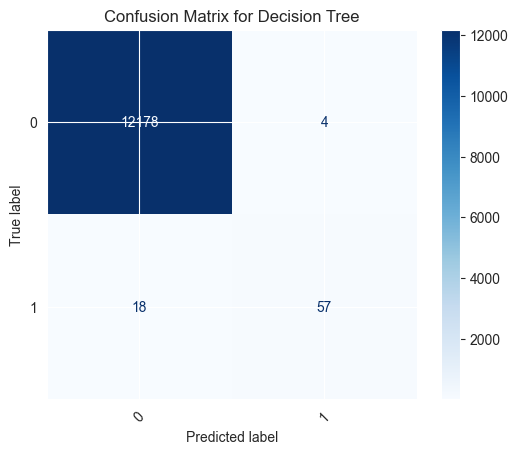


Evaluating Random Forest...
Accuracy for Random Forest: 0.9985

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12182
           1       0.97      0.79      0.87        75

    accuracy                           1.00     12257
   macro avg       0.98      0.89      0.93     12257
weighted avg       1.00      1.00      1.00     12257


Confusion Matrix:
[[12180     2]
 [   16    59]]


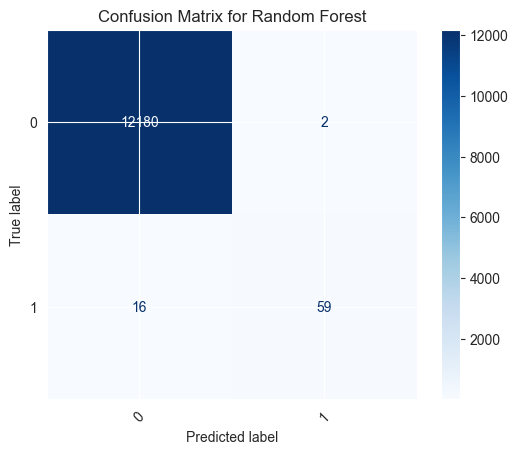


Evaluating Gradient Boosting...
Accuracy for Gradient Boosting: 0.9982

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12182
           1       0.93      0.76      0.84        75

    accuracy                           1.00     12257
   macro avg       0.97      0.88      0.92     12257
weighted avg       1.00      1.00      1.00     12257


Confusion Matrix:
[[12178     4]
 [   18    57]]


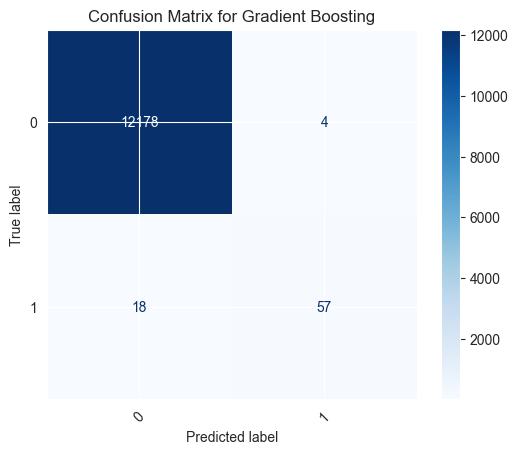


--- Evaluation Results ---
Decision Tree - Accuracy: 0.9982
Random Forest - Accuracy: 0.9985
Gradient Boosting - Accuracy: 0.9982


In [600]:
# Evaluation Section
evaluation_results = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_results[model_name] = {'Accuracy': accuracy}

    # Print results
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Summary of Results
print("\n--- Evaluation Results ---")
for model_name, metrics in evaluation_results.items():
    print(f"{model_name} - Accuracy: {metrics['Accuracy']:.4f}")

In [601]:
# Cross-Validation Section
cross_validation_results = {}

for model_name, model in models.items():
    print(f"\nCross-Validating {model_name}...")

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate mean and standard deviation of cross-validation scores
    cross_validation_results[model_name] = {
        'Cross-Validation Mean': np.mean(cv_scores),
        'Cross-Validation Std': np.std(cv_scores)
    }

    # Print cross-validation results
    print(f"Cross-Validation Mean Accuracy for {model_name}: {np.mean(cv_scores):.4f}")
    print(f"Cross-Validation Standard Deviation for {model_name}: {np.std(cv_scores):.4f}")


print("\n--- Cross-Validation Results ---")
for model_name, metrics in cross_validation_results.items():
    print(f"{model_name} - Mean Accuracy: {metrics['Cross-Validation Mean']:.4f}, "
          f"Std: {metrics['Cross-Validation Std']:.4f}")



Cross-Validating Decision Tree...
Cross-Validation Mean Accuracy for Decision Tree: 0.9977
Cross-Validation Standard Deviation for Decision Tree: 0.0005

Cross-Validating Random Forest...
Cross-Validation Mean Accuracy for Random Forest: 0.9982
Cross-Validation Standard Deviation for Random Forest: 0.0005

Cross-Validating Gradient Boosting...
Cross-Validation Mean Accuracy for Gradient Boosting: 0.9974
Cross-Validation Standard Deviation for Gradient Boosting: 0.0005

--- Cross-Validation Results ---
Decision Tree - Mean Accuracy: 0.9977, Std: 0.0005
Random Forest - Mean Accuracy: 0.9982, Std: 0.0005
Gradient Boosting - Mean Accuracy: 0.9974, Std: 0.0005



--- Combined Model Performance ---
               Model                 Metric     Value
0      Decision Tree               Accuracy  0.998205
1      Decision Tree  Cross-Validation Mean  0.997661
2      Random Forest               Accuracy  0.998531
3      Random Forest  Cross-Validation Mean  0.998205
4  Gradient Boosting               Accuracy  0.998205
5  Gradient Boosting  Cross-Validation Mean  0.997416


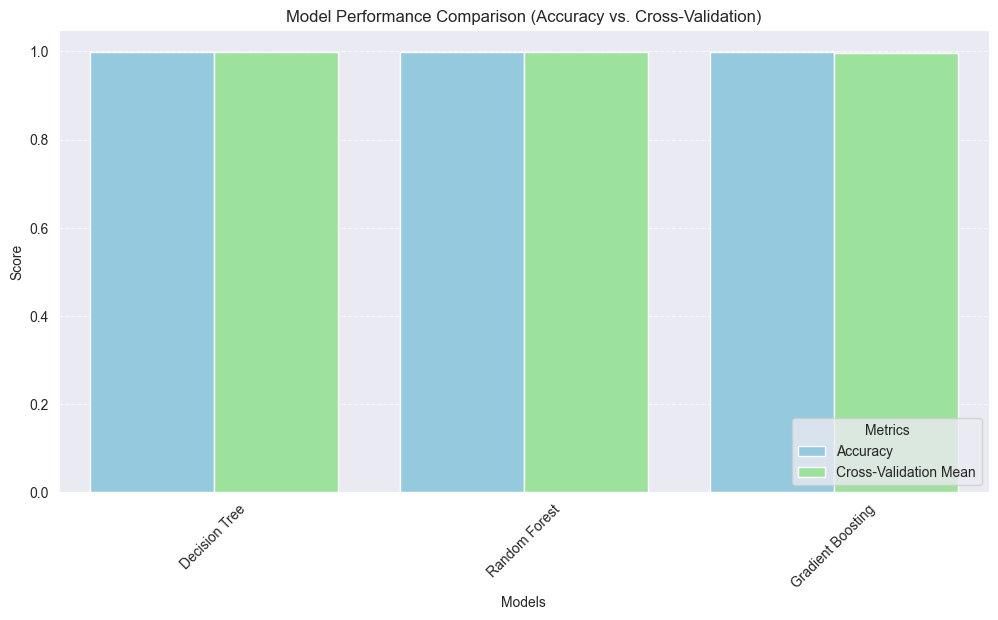

In [607]:
# Combine evaluation and cross-validation results
combined_results = []

for model_name in models.keys():
    combined_results.append({
        'Model': model_name,
        'Metric': 'Accuracy',
        'Value': evaluation_results[model_name]['Accuracy']
    })
    combined_results.append({
        'Model': model_name,
        'Metric': 'Cross-Validation Mean',
        'Value': cross_validation_results[model_name]['Cross-Validation Mean']
    })

# Create a DataFrame for better visualization
comparison_df = pd.DataFrame(combined_results)

# Display the DataFrame
print("\n--- Combined Model Performance ---")
print(comparison_df)

# Plot model performance comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x="Model", y="Value", hue="Metric", palette=["skyblue", "lightgreen"])
plt.title("Model Performance Comparison (Accuracy vs. Cross-Validation)")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.legend(title="Metrics", loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [603]:
# Fragen
# soll ich knn, svm und NB löschen.
# smote technik benutzen? welcher art?
# go for binary problem
# use only main 3 models
#can use smote, but have to explain it later